In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#Create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
#Reflect an existing database into a new model
Base = automap_base()

In [6]:
#Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
#View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#Save references to tables 'Station' & "Measurement"

Station = Base.classes.station

Measurement = Base.classes.measurement

In [9]:
#Create our ses.sion (link) from Python to the DB
session = Session(engine)

In [36]:
session.query(Measurement.date).group_by(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-13'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-29'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-02'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-10'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-18'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-27'),
 ('2010-02-28'

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, starting from the most recent data point in the database. 

precip = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= 2016-8-23).all()


,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [37]:
#Put data into dataframe, set index to date 
precip_df = pd.DataFrame(precip)
precip_df.set_index('date', inplace=True)


In [38]:
precip_df

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


<function matplotlib.pyplot.show(close=None, block=None)>

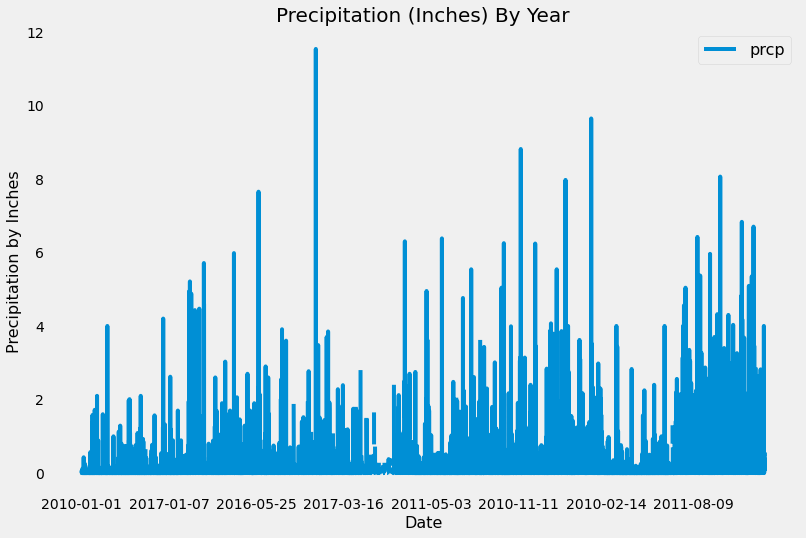

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data.

precip_df.plot.line(figsize=(12,8))
plt.grid()
plt.title("Precipitation (Inches) By Year", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Precipitation by Inches", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)

plt.show

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data.
precip_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = activestations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == best_station).\
                filter(Measurement.date >= 2016-8-23).all()
tobs_df = pd.DataFrame(temp_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,70.0
USC00519281,62.0
USC00519281,74.0
USC00519281,75.0
USC00519281,74.0


# Close session

In [152]:
# Close Session
session.close()